# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix
import torch.nn.functional as F

# Get And Prepare Data


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"rezaseidgar","key":"8707ca4acaf7e599f9a5345f4a576db0"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d zalando-research/fashionmnist

fashionmnist.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

 fashion-mnist_test.csv   'kaggle (2).json'	    t10k-labels-idx1-ubyte
 fashion-mnist_train.csv   kaggle.json		    train-images-idx3-ubyte
 fashionmnist.zip	   sample_data		    train-labels-idx1-ubyte
'kaggle (1).json'	   t10k-images-idx3-ubyte


In [ ]:
!unzip '/content/fashionmnist.zip' -d '/content/'

Archive:  /content/fashionmnist.zip
replace /content/fashion-mnist_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
data_train = pd.read_csv('/content/fashion-mnist_train.csv')
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_test = pd.read_csv('/content/fashion-mnist_test.csv')
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train.shape

(60000, 785)

In [ ]:
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
class FashionDataset(Dataset):
    """User defined class to build a datset using Pytorch class Dataset."""
    
    def __init__(self, data, transform = None):
        """Method to initilaize variables.""" 
        self.fashion_MNIST = np.array(data.values)
        self.transform = transform
        

        
  
        self.y = self.fashion_MNIST[:,0]
        temp = self.fashion_MNIST[:,1:]

        self.n = self.fashion_MNIST.shape[0]

        self.x = np.asarray(temp).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.y[index]
        image = self.x[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return self.n

In [ ]:
# Transform data into Tensor that has a range from 0 to 1
train_set = FashionDataset(data_train, transform=transforms.Compose([transforms.ToTensor()]))
test_set = FashionDataset(data_test, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=64,shuffle=True)
test_loader = DataLoader(test_set, batch_size=64,shuffle=True)

In [ ]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat",
                 5: "Sandal",
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

# Visualization

In [ ]:
a = next(iter(train_loader))
image,labels = a

In [ ]:
labels.size()

torch.Size([64])

In [ ]:
image.size()

torch.Size([64, 1, 28, 28])

Dress


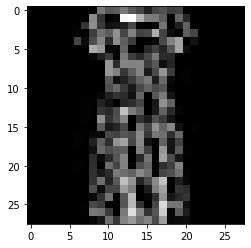

In [ ]:
plt.imshow(image.squeeze()[1], cmap="gray")
print(output_label(labels[1]))

T-shirt/Top


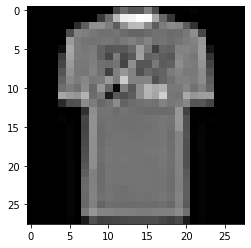

In [ ]:
plt.imshow(image.squeeze()[10], cmap="gray")
print(output_label(labels[10]))

Shirt


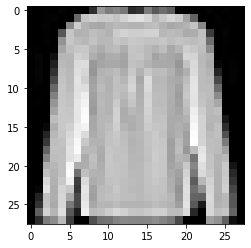

In [ ]:
plt.imshow(image.squeeze()[20], cmap="gray")
print(output_label(labels[20]))

In [ ]:
demo_loader = DataLoader(train_set, batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])


labels:  Pullover, Ankle Boot, Shirt, T-shirt/Top, Dress, Coat, Coat, Sandal, Coat, Bag, 

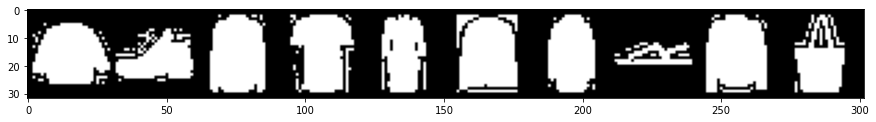

In [ ]:
grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")

# Build First Model

In [ ]:
class SimpleNet(nn.Module):

    def __init__(self):

        super(SimpleNet,self).__init__()

        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512,512)
        self.fc3 = nn.Linear(512,10)


          
    def forward(self,x):

        x = x.view(-1,28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

## Set Parameter

In [ ]:
model = SimpleNet()
model.to(device)

learning_rate = 0.001

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr =learning_rate)
print(model)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


## Training

In [ ]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
    
        train = Variable(images)
        labels = Variable(labels)
        
        outputs = model(train)
        loss = error(outputs, labels)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    
        count += 1
    
    
        if not (count % 50): 
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images)
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.45721566677093506, Accuracy: 82.20999908447266%
Iteration: 1000, Loss: 0.5195469856262207, Accuracy: 84.58000183105469%
Iteration: 1500, Loss: 0.5188162326812744, Accuracy: 84.38999938964844%
Iteration: 2000, Loss: 0.3084374964237213, Accuracy: 84.8499984741211%
Iteration: 2500, Loss: 0.3847133219242096, Accuracy: 85.93000030517578%
Iteration: 3000, Loss: 0.3495562970638275, Accuracy: 87.01000213623047%
Iteration: 3500, Loss: 0.27377694845199585, Accuracy: 86.81999969482422%
Iteration: 4000, Loss: 0.2403988242149353, Accuracy: 87.4800033569336%
Iteration: 4500, Loss: 0.21527926623821259, Accuracy: 87.36000061035156%


## Result

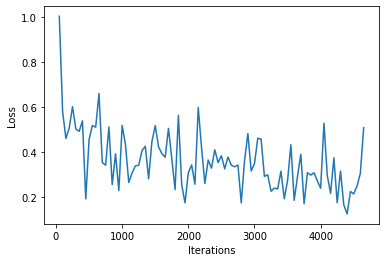

In [ ]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

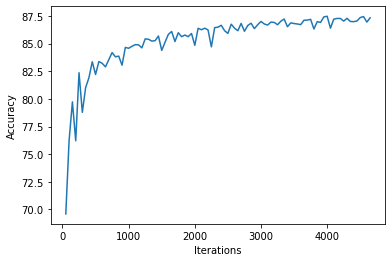

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
class_correct = [0.0] * 10
total_correct = [0.0] * 10

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(16):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/Top: 81.64%
Accuracy of Trouser: 98.44%
Accuracy of Pullover: 73.64%
Accuracy of Dress: 85.83%
Accuracy of Coat: 91.80%
Accuracy of Sandal: 93.00%
Accuracy of Shirt: 54.44%
Accuracy of Sneaker: 90.12%
Accuracy of Bag: 96.00%
Accuracy of Ankle Boot: 96.48%


# Model With Dropout


In [ ]:
class DropoutNet(nn.Module):

    def __init__(self):

        super(DropoutNet,self).__init__()

        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512,512)
        self.fc3 = nn.Linear(512,10)
        self.droput = nn.Dropout(0.2)

          
    def forward(self,x):

        x = x.view(-1,28*28)
        x = F.relu(self.fc1(x))
        x = self.droput(x)
        x = F.relu(self.fc2(x))
        x = self.droput(x)
        x = self.fc3(x)

        return x

## Set Parameter

In [ ]:
model = DropoutNet()
model.to(device)

learning_rate = 0.001

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr =learning_rate)
print(model)

DropoutNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)


## Training

In [ ]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
    
        train = Variable(images)
        labels = Variable(labels)
        
        outputs = model(train)
        loss = error(outputs, labels)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    
        count += 1
    
    
        if not (count % 50):
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images)
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.5073100924491882, Accuracy: 77.79000091552734%
Iteration: 1000, Loss: 0.5648890733718872, Accuracy: 80.81999969482422%
Iteration: 1500, Loss: 0.5471484661102295, Accuracy: 82.13999938964844%
Iteration: 2000, Loss: 0.4829428195953369, Accuracy: 82.70999908447266%
Iteration: 2500, Loss: 0.645226776599884, Accuracy: 83.68000030517578%
Iteration: 3000, Loss: 0.22735396027565002, Accuracy: 83.9800033569336%
Iteration: 3500, Loss: 0.5191619992256165, Accuracy: 84.5%
Iteration: 4000, Loss: 0.4098263680934906, Accuracy: 83.69999694824219%
Iteration: 4500, Loss: 0.21368290483951569, Accuracy: 84.51000213623047%


## Result

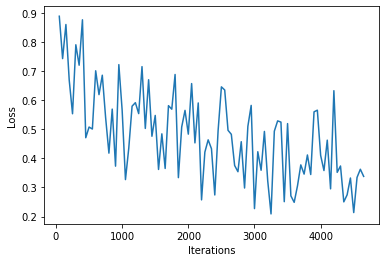

In [ ]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

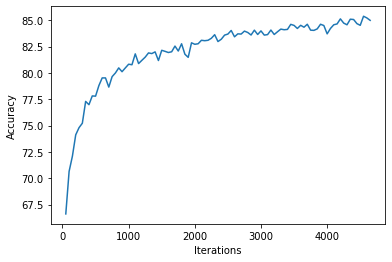

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
class_correct = [0.0] * 10
total_correct = [0.0] * 10

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(16):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/Top: 80.08%
Accuracy of Trouser: 96.46%
Accuracy of Pullover: 74.36%
Accuracy of Dress: 88.97%
Accuracy of Coat: 77.46%
Accuracy of Sandal: 93.03%
Accuracy of Shirt: 48.92%
Accuracy of Sneaker: 91.98%
Accuracy of Bag: 95.31%
Accuracy of Ankle Boot: 93.82%


# Model With Some Changes(Bad Model)


In [ ]:
class DropoutNet(nn.Module):

    def __init__(self):

        super(DropoutNet,self).__init__()

        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512,480)
        self.fc3 = nn.Linear(480,480)
        self.fc4 = nn.Linear(480,256)
        self.fc5 = nn.Linear(256,10)

        self.droput = nn.Dropout(0.2)

          
    def forward(self,x):

        x = x.view(-1,28*28)
        x = F.sigmoid(self.fc1(x))
        x = self.droput(x)
        x = F.sigmoid(self.fc2(x))        
        x = self.droput(x)
        x = F.sigmoid(self.fc3(x))        
        x = self.droput(x)
        x = F.sigmoid(self.fc4(x))        
        x = self.droput(x)
        x = self.fc5(x)

        return x

## Set Parameter

In [ ]:
model = DropoutNet()
model.to(device)

learning_rate = 0.001

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr =learning_rate)
print(model)

DropoutNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=480, bias=True)
  (fc3): Linear(in_features=480, out_features=480, bias=True)
  (fc4): Linear(in_features=480, out_features=256, bias=True)
  (fc5): Linear(in_features=256, out_features=10, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)


## Training

In [ ]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
    
        train = Variable(images)
        labels = Variable(labels)
        
        outputs = model(train)
        loss = error(outputs, labels)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    
        count += 1
    
    
        if not (count % 50):   
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images)
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Iteration: 500, Loss: 2.315014600753784, Accuracy: 9.859999656677246%
Iteration: 1000, Loss: 2.2807810306549072, Accuracy: 10.329999923706055%
Iteration: 1500, Loss: 2.32038950920105, Accuracy: 9.390000343322754%
Iteration: 2000, Loss: 2.325368881225586, Accuracy: 10.15999984741211%
Iteration: 2500, Loss: 2.332637071609497, Accuracy: 9.829999923706055%
Iteration: 3000, Loss: 2.304866313934326, Accuracy: 9.890000343322754%
Iteration: 3500, Loss: 2.290306329727173, Accuracy: 10.59000015258789%
Iteration: 4000, Loss: 2.291043758392334, Accuracy: 10.369999885559082%
Iteration: 4500, Loss: 2.323803663253784, Accuracy: 10.550000190734863%


## Result

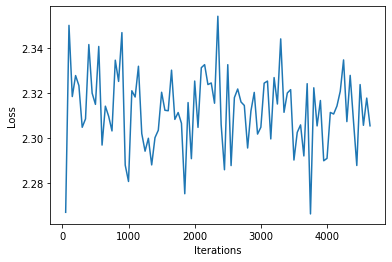

In [ ]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

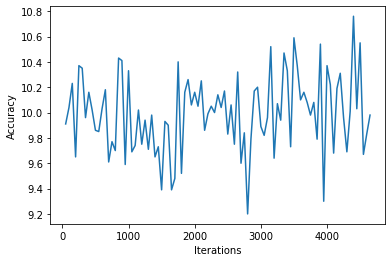

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
class_correct = [0.0] * 10
total_correct = [0.0] * 10

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(16):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/Top: 7.59%
Accuracy of Trouser: 8.70%
Accuracy of Pullover: 12.03%
Accuracy of Dress: 14.94%
Accuracy of Coat: 9.20%
Accuracy of Sandal: 10.73%
Accuracy of Shirt: 10.98%
Accuracy of Sneaker: 8.70%
Accuracy of Bag: 16.17%
Accuracy of Ankle Boot: 8.09%


# Model With Some Changes(Good Model)


In [ ]:
class DropoutNet(nn.Module):

    def __init__(self):

        super(DropoutNet,self).__init__()

        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,256)
        self.fc4 = nn.Linear(256,128)
        self.fc5 = nn.Linear(128,10)

        self.droput = nn.Dropout(0.2)

          
    def forward(self,x):

        x = x.view(-1,28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))        
        x = F.relu(self.fc3(x))        
        x = F.relu(self.fc4(x))        
        x = self.fc5(x)

        return x

## Set Parameter

In [ ]:
model = DropoutNet()
model.to(device)

learning_rate = 0.001

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr =learning_rate)
print(model)

DropoutNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=10, bias=True)
  (droput): Dropout(p=0.2, inplace=False)
)


## Training

In [ ]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
    
        train = Variable(images)
        labels = Variable(labels)
        
        outputs = model(train)
        loss = error(outputs, labels)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    
        count += 1
    
    
        if not (count % 50):
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images)
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.42785072326660156, Accuracy: 82.44000244140625%
Iteration: 1000, Loss: 0.3819420039653778, Accuracy: 82.7300033569336%
Iteration: 1500, Loss: 0.3046529293060303, Accuracy: 85.1500015258789%
Iteration: 2000, Loss: 0.4339976906776428, Accuracy: 85.81999969482422%
Iteration: 2500, Loss: 0.6077278852462769, Accuracy: 86.01000213623047%
Iteration: 3000, Loss: 0.6170209646224976, Accuracy: 86.27999877929688%
Iteration: 3500, Loss: 0.4031330645084381, Accuracy: 86.1500015258789%
Iteration: 4000, Loss: 0.27392253279685974, Accuracy: 86.11000061035156%
Iteration: 4500, Loss: 0.3380778133869171, Accuracy: 87.20999908447266%


## Result

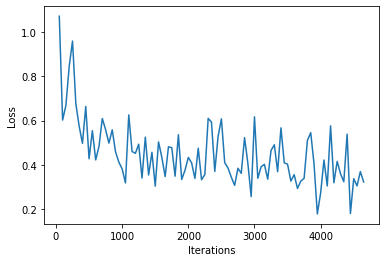

In [ ]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

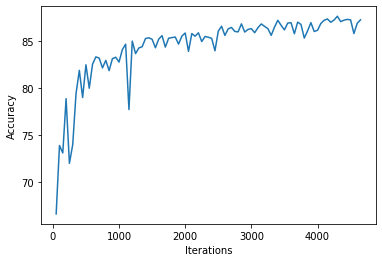

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
class_correct = [0.0] * 10
total_correct = [0.0] * 10

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(16):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/Top: 64.87%
Accuracy of Trouser: 98.44%
Accuracy of Pullover: 76.64%
Accuracy of Dress: 88.51%
Accuracy of Coat: 88.26%
Accuracy of Sandal: 90.94%
Accuracy of Shirt: 72.40%
Accuracy of Sneaker: 94.09%
Accuracy of Bag: 97.24%
Accuracy of Ankle Boot: 93.50%


# Early Stopping

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train = pd.read_csv('/content/fashion-mnist_train.csv')
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_test = pd.read_csv('/content/fashion-mnist_test.csv')
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_train, data_valid = train_test_split(data_train, test_size=0.2, random_state=42)

In [ ]:
data_valid.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
12628,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37730,8,0,0,0,0,0,0,0,0,0,...,187,190,196,201,209,221,218,211,102,0
39991,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8525,5,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8279,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Transform data into Tensor that has a range from 0 to 1
train_set = FashionDataset(data_train, transform=transforms.Compose([transforms.ToTensor()]))
test_set = FashionDataset(data_test, transform=transforms.Compose([transforms.ToTensor()]))
valid_set = FashionDataset(data_valid, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=64,shuffle=True)
test_loader = DataLoader(test_set, batch_size=64,shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=64,shuffle=True)

## Set Parameter

In [ ]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping

ModuleNotFoundError: ignored

In [ ]:
from transformers import Trainer

In [ ]:
model = SimpleNet()
model.to(device)

learning_rate = 0.001

error = nn.CrossEntropyLoss()
trainer = Trainer(callbacks=[EarlyStopping(monitor="val_loss", mode="min")])
trainer.fit(model)
optimizer = torch.optim.SGD(model.parameters(),lr =learning_rate)
print(model)

## Training

In [ ]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []
early_stopping = EarlyStopping(patience=patience, verbose=True)

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
    
        train = Variable(images)
        labels = Variable(labels)
        
        outputs = model(train)
        loss = error(outputs, labels)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    
        count += 1
    
    
        if not (count % 50): 
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images)
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

## Result

In [ ]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
class_correct = [0.0] * 10
total_correct = [0.0] * 10

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(16):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

# Regularization


## Set Parameter

In [ ]:
model = SimpleNet()
model.to(device)

learning_rate = 0.001

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr =learning_rate)
print(model)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


## Training

In [ ]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
    
        train = Variable(images)
        labels = Variable(labels)
        
        outputs = model(train)
        loss = error(outputs, labels)

        
        R_lambda = 0.001
        R_norm = sum(torch.norm(w,p=2) for w in model.parameters())

        loss = loss + R_norm * R_lambda
                
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    
        count += 1
    
    
        if not (count % 50): 
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images)
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.38524216413497925, Accuracy: 82.44999694824219%
Iteration: 1000, Loss: 0.6054132580757141, Accuracy: 84.94999694824219%
Iteration: 1500, Loss: 0.3891661763191223, Accuracy: 84.9000015258789%
Iteration: 2000, Loss: 0.46925485134124756, Accuracy: 85.37000274658203%
Iteration: 2500, Loss: 0.34967222809791565, Accuracy: 86.18000030517578%
Iteration: 3000, Loss: 0.2894170582294464, Accuracy: 86.33000183105469%
Iteration: 3500, Loss: 0.3248674273490906, Accuracy: 86.95999908447266%


## Result

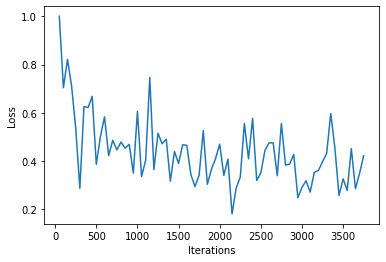

In [ ]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

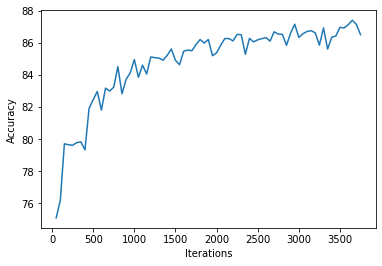

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
class_correct = [0.0] * 10
total_correct = [0.0] * 10

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(16):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/Top: 77.99%
Accuracy of Trouser: 96.97%
Accuracy of Pullover: 75.00%
Accuracy of Dress: 88.51%
Accuracy of Coat: 73.73%
Accuracy of Sandal: 97.14%
Accuracy of Shirt: 74.30%
Accuracy of Sneaker: 89.58%
Accuracy of Bag: 94.62%
Accuracy of Ankle Boot: 92.86%




# L1


## Set Parameter

In [ ]:
model = SimpleNet()
model.to(device)

learning_rate = 0.001

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr =learning_rate)
print(model)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


## Training

In [ ]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
    
        train = Variable(images)
        labels = Variable(labels)
        
        outputs = model(train)
        loss = error(outputs, labels)
     
        l1_lambda = 0.001
        l1_norm = sum(p.abs().sum() for p in model.parameters())
 
        loss = loss + l1_lambda * l1_norm
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    
        count += 1
    
    
        if not (count % 50): 
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images)
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 13.152446746826172, Accuracy: 81.73999786376953%
Iteration: 1000, Loss: 12.958308219909668, Accuracy: 84.5%
Iteration: 1500, Loss: 12.432168006896973, Accuracy: 85.08999633789062%
Iteration: 2000, Loss: 11.980324745178223, Accuracy: 86.0%
Iteration: 2500, Loss: 11.892988204956055, Accuracy: 86.33000183105469%
Iteration: 3000, Loss: 11.524385452270508, Accuracy: 87.04000091552734%
Iteration: 3500, Loss: 11.310235023498535, Accuracy: 86.79000091552734%


## Result

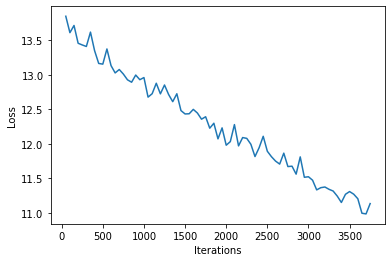

In [ ]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

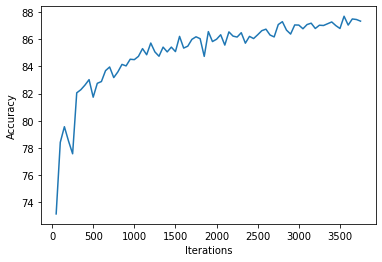

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
class_correct = [0.0] * 10
total_correct = [0.0] * 10

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(16):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/Top: 87.55%
Accuracy of Trouser: 95.69%
Accuracy of Pullover: 78.00%
Accuracy of Dress: 91.73%
Accuracy of Coat: 85.41%
Accuracy of Sandal: 90.55%
Accuracy of Shirt: 62.50%
Accuracy of Sneaker: 94.44%
Accuracy of Bag: 95.55%
Accuracy of Ankle Boot: 93.78%


# L2


## Set Parameter

In [ ]:
model = SimpleNet()
model.to(device)

learning_rate = 0.001

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr =learning_rate)
print(model)

SimpleNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


## Training

In [ ]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
    
        train = Variable(images)
        labels = Variable(labels)
        
        outputs = model(train)
        loss = error(outputs, labels)

        l2_lambda = 0.001
        l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
        loss = loss + l2_lambda * l2_norm        

        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    
        count += 1
    
    
        if not (count % 50): 
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images)
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.8193514943122864, Accuracy: 83.41999816894531%
Iteration: 1000, Loss: 0.7314616441726685, Accuracy: 85.04000091552734%
Iteration: 1500, Loss: 0.8550213575363159, Accuracy: 84.38999938964844%
Iteration: 2000, Loss: 0.6407794952392578, Accuracy: 86.4800033569336%
Iteration: 2500, Loss: 0.7112564444541931, Accuracy: 85.55999755859375%
Iteration: 3000, Loss: 0.8674428462982178, Accuracy: 86.08999633789062%
Iteration: 3500, Loss: 0.6615458130836487, Accuracy: 86.69000244140625%


## Result

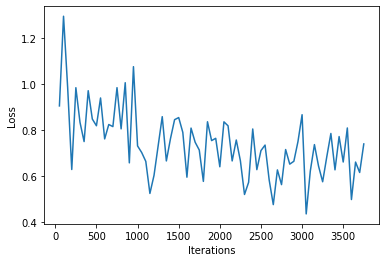

In [ ]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

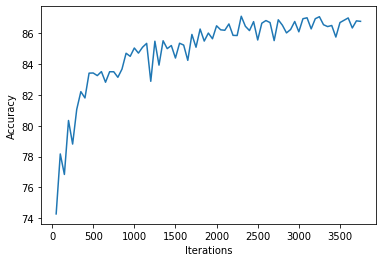

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
class_correct = [0.0] * 10
total_correct = [0.0] * 10

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(16):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/Top: 74.79%
Accuracy of Trouser: 97.53%
Accuracy of Pullover: 86.89%
Accuracy of Dress: 93.42%
Accuracy of Coat: 82.12%
Accuracy of Sandal: 95.67%
Accuracy of Shirt: 65.59%
Accuracy of Sneaker: 92.24%
Accuracy of Bag: 92.62%
Accuracy of Ankle Boot: 97.23%


# Model With Batch Normalization

In [ ]:
class BNNet(nn.Module):

    def __init__(self):

        super(BNNet,self).__init__()
        
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512,512)
        self.bn=nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512,10)



          
    def forward(self,x):

        x = x.view(-1,28*28)
        x = self.fc1(x)
        x = self.bn(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = self.bn(x)
        x = F.relu(x)
        x = self.fc3(x)

        return x

## Set Parameter

In [ ]:
model = BNNet()
model.to(device)

learning_rate = 0.001

error = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(),lr =learning_rate)
print(model)

BNNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (bn): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)


## Training

In [ ]:
num_epochs = 5
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

predictions_list = []
labels_list = []

for epoch in range(num_epochs):
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
    
        train = Variable(images)
        labels = Variable(labels)
        
        outputs = model(train)
        loss = error(outputs, labels)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    
        count += 1
    
    
        if not (count % 50): 
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images)
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

Iteration: 500, Loss: 0.7952395677566528, Accuracy: 74.79000091552734%
Iteration: 1000, Loss: 0.4419400990009308, Accuracy: 78.80999755859375%
Iteration: 1500, Loss: 0.4969462454319, Accuracy: 80.37999725341797%
Iteration: 2000, Loss: 0.4945734441280365, Accuracy: 81.62999725341797%
Iteration: 2500, Loss: 0.568838894367218, Accuracy: 82.86000061035156%
Iteration: 3000, Loss: 0.5938295722007751, Accuracy: 83.29000091552734%
Iteration: 3500, Loss: 0.3982032239437103, Accuracy: 83.76000213623047%


## Result

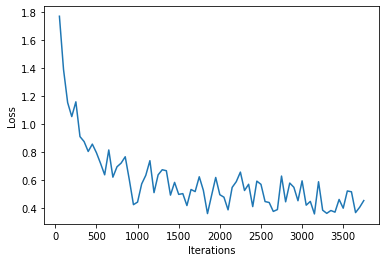

In [ ]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

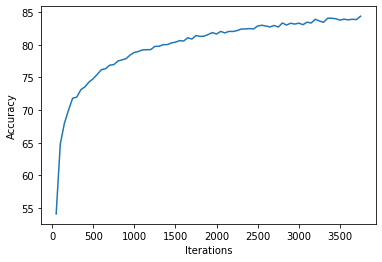

In [ ]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
class_correct = [0.0] * 10
total_correct = [0.0] * 10

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(16):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/Top: 78.57%
Accuracy of Trouser: 95.63%
Accuracy of Pullover: 74.74%
Accuracy of Dress: 84.43%
Accuracy of Coat: 81.86%
Accuracy of Sandal: 89.58%
Accuracy of Shirt: 54.22%
Accuracy of Sneaker: 90.04%
Accuracy of Bag: 94.14%
Accuracy of Ankle Boot: 91.06%
